# Week 07 - Maps

#### Topics
 1. Intro to maps in bqplot (review)
 2. Geopandas
    * Champaign districts & apartments (extra)
    * Public data
 3. Geopandas + contextily
 4. Geopandas + ipywidgets
 
 
Extra:
 * US waterways
 * more with bqplot & geojson data
 * Super quick ipyleaflets

In [1]:
# import our usual things
#####%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot

## 1. Intro to Maps in bqplot

Let's start with a few simple bqplots.

Let's check out a few other projections for world maps.

In [2]:
# shape data/"axis"
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# scales
sc_geo = bqplot.Mercator() # not a great projection! 

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in a figure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

But also an issue:

In [3]:
# "axis"/shape data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# scales
sc_geo = bqplot.Gnomonic() # not a great projection! 

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in afigure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

Let's zoom in on where we are: the US

In [4]:
# "axis" - in this case its a set of outlines
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# scales
sc_geo = bqplot.AlbersUSA() # a projection from the globe (sphere) onto a plane (US centric)


# marks
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo})

# put it all together in afigure
fig = bqplot.Figure(marks=[states_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

`bqplot` is nice because there are features we can display interactively, like info available in tooltips:

In [5]:
# scales
sc_geo = bqplot.AlbersUSA() # a projection from the globe (sphere) onto a plane (US centric)

# "axis" - in this case its a set of outlines
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# hover tooltip
def_tt = bqplot.Tooltip(fields=['id', 'name'])

# marks
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=def_tt)

# add in interactivity
states_map.interactions = {'click': 'select', 'hover': 'tooltip'}

# put it all together in afigure
fig = bqplot.Figure(marks=[states_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

Let's check out which maps we have available to us:

In [6]:
!ls ~/opt/anaconda3/pkgs/bqplot-0.12.30-pyhd8ed1ab_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


So, there is not a ton of map data in there, and also bqplot makes it hard to create multiple, interactive layers.

How do we access other kinds of maps and map data?  Let's check out a few other things.

## 2. Geopandas

Where can we get data?  There are a few that are "stored" in geopandas:

In [7]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Not many, but we plot the NYC boroughs very easy:

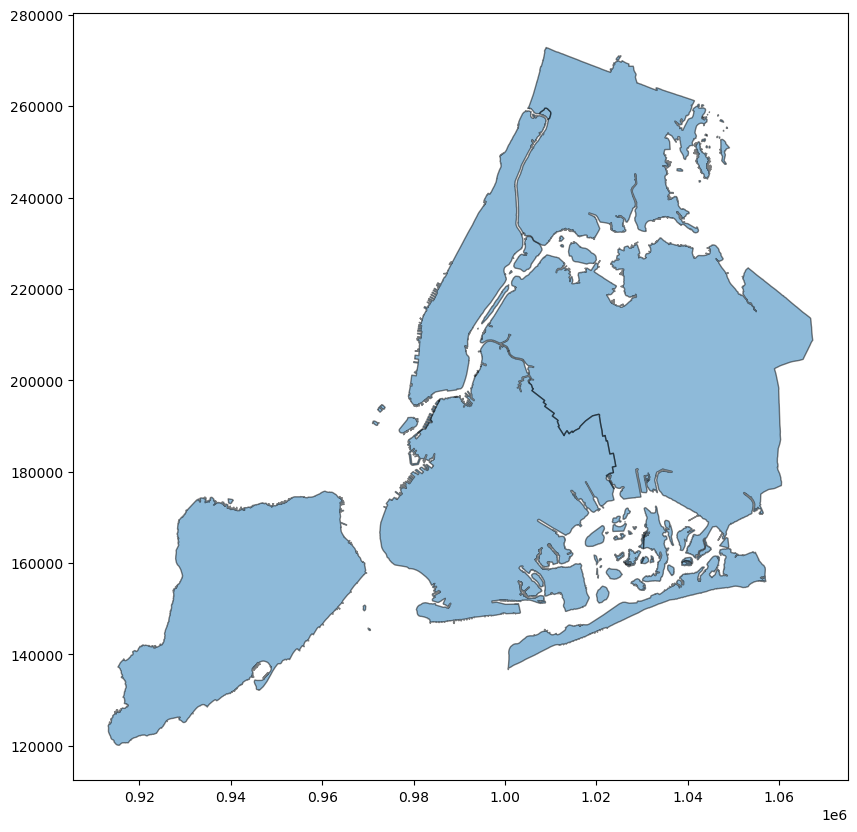

In [8]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

### 2.1 Champaign City data -- districts & apartments

We live in a pretty cool city, that actually has a lot of openly accessible datasets here:

https://gis-cityofchampaign.opendata.arcgis.com/

Specifically, you can find lots of data here: https://gis-cityofchampaign.opendata.arcgis.com/search?collection=Dataset

We have a really nice interface that we can check out this data easily online.  Let's check out a map of the city council districts: https://gis-cityofchampaign.opendata.arcgis.com/datasets/city-council-districts

There is a nice visualization at the top that actually plots for us a lot of useful things!  Let's see how we can access this dataset and make some plots ourselves, by going to `APIs` $\rightarrow$ `GeoJSON`.

Let's grab: https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson

This is showing the city council districts -- i.e. areas of Champaign that are seperated by representation on the city council.

In [9]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

Like with any pandas dataframe, we can take a look at things:

In [10]:
gdf_councils

OBJECTID_1 District        Council_me   ShapeSTArea  ShapeSTLength  \
0         811        5   Vanna Pianfetti  1.838498e+08  211060.175261   
1         812        3    Daniel Iniguez  2.009197e+08  144362.359386   
2         813        1   Davion Williams  1.078965e+08   83420.727939   
3         814        4  Michael Foellmer  1.049800e+08   77363.320814   
4         815        2       Alicia Beck  5.164512e+07   62243.277115   

                                            geometry  
0  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4  POLYGON ((-88.23537 40.10798, -88.23537 40.107...

In [11]:
gdf_councils.head()

OBJECTID_1 District        Council_me   ShapeSTArea  ShapeSTLength  \
0         811        5   Vanna Pianfetti  1.838498e+08  211060.175261   
1         812        3    Daniel Iniguez  2.009197e+08  144362.359386   
2         813        1   Davion Williams  1.078965e+08   83420.727939   
3         814        4  Michael Foellmer  1.049800e+08   77363.320814   
4         815        2       Alicia Beck  5.164512e+07   62243.277115   

                                            geometry  
0  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4  POLYGON ((-88.23537 40.10798, -88.23537 40.107...

In this case, `describe` probably won't help us, but we do have this available to us:

In [12]:
gdf_councils.describe()

OBJECTID_1   ShapeSTArea  ShapeSTLength
count    5.000000  5.000000e+00       5.000000
mean   813.000000  1.298582e+08  115689.972103
std      1.581139  6.161040e+07   61814.979912
min    811.000000  5.164512e+07   62243.277115
25%    812.000000  1.049800e+08   77363.320814
50%    813.000000  1.078965e+08   83420.727939
75%    814.000000  1.838498e+08  144362.359386
max    815.000000  2.009197e+08  211060.175261

We can also make quick plots:

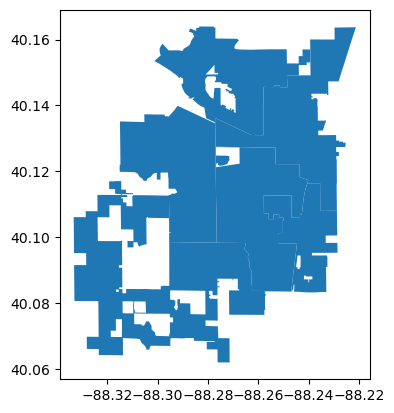

In [13]:
gdf_councils.plot()

We can make fancier plots with matplotlib:

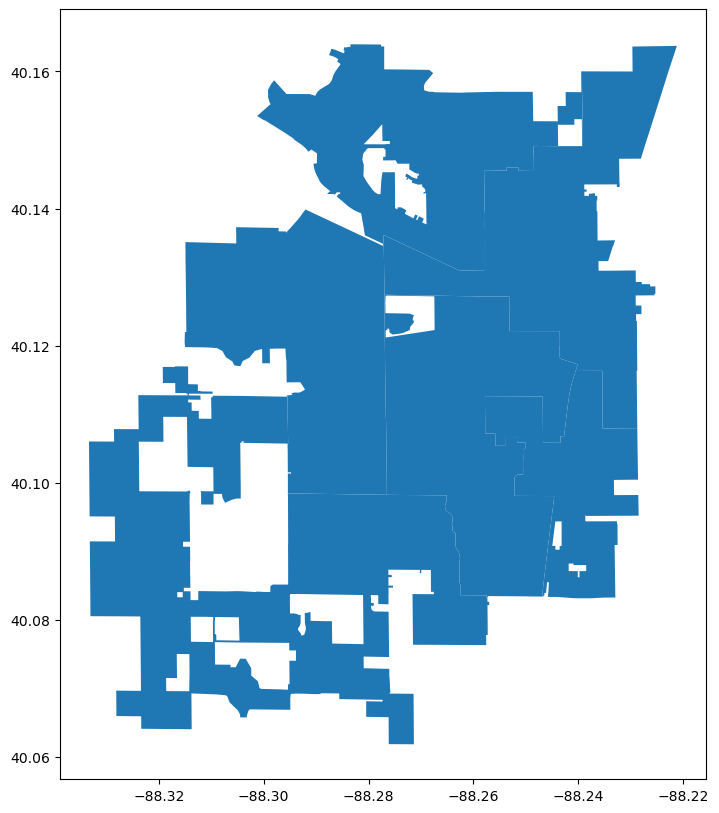

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_councils.plot(ax=ax)

plt.show()

There are also a few geo-specific functions in there.  For example, we can plot out boundaries of regions:

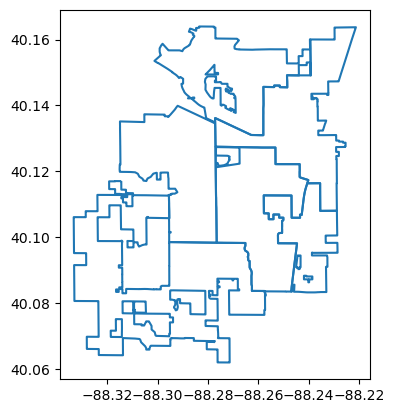

In [15]:
gdf_councils.boundary.plot()

We can get the bounding boxes for each council district:

In [16]:
gdf_councils.bounds

minx       miny       maxx       maxy
0 -88.333303  40.061894 -88.257012  40.116995
1 -88.315071  40.098268 -88.239120  40.163956
2 -88.277158  40.107938 -88.221225  40.163721
3 -88.276971  40.083257 -88.240119  40.127432
4 -88.257818  40.083182 -88.228505  40.116346

We can also find the centers of each of each specific shape:

In [17]:
gdf_councils.centroid # ignoring .to_crs() error for now

/var/folders/qt/_0bv3pr14c97mcyg8fc554bm0000gn/T/ipykernel_11014/1666737993.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_councils.centroid # ignoring .to_crs() error for now


0    POINT (-88.29985 40.08720)
1    POINT (-88.28230 40.13391)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

You might get a warning about a CRS, i.e. a *coordinate reference system*.

There is also information about the coordinate reference system:

In [18]:
gdf_councils.crs # CRS = Coordinate Reference System

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

This is a specific projection & coordinate system:

https://spatialreference.org/ref/epsg/wgs-84/

https://epsg.io/4326

We can use geopandas to overplot data as well.  Let's also overlay the properties that the city owns: https://gis-cityofchampaign.opendata.arcgis.com/datasets/city-owned-properties

In [19]:
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

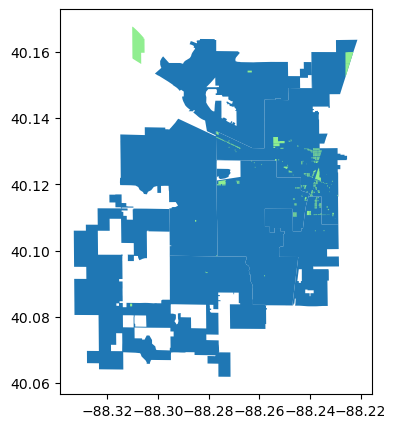

In [20]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

gdf_props.plot(ax=ax, color='lightgreen')

plt.show()

We can move to our area (if we were on campus):

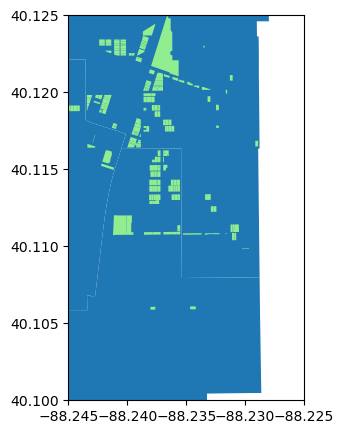

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

gdf_props.plot(ax=ax, color='lightgreen')

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

### Extra: apartments & building types too -- skip, we do this below in a different way

This will do a bit of data manipulation to be able to plot apartments with different color schemes.

In [22]:
gdf_apts = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

Quick look:

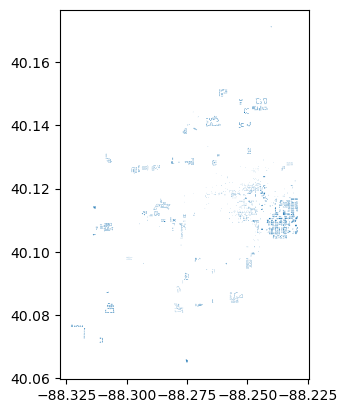

In [23]:
gdf_apts.plot()

What can we color by?

In [24]:
gdf_apts.head()

OBJECTID             Address        Parcel Units Stories  UniqueID  \
0         1  2009 Moreland Blvd  412001126038    36       3       0.0   
1         2  2011 Moreland Blvd  412001126038    36      3        1.0   
2         3  2007 Moreland Blvd  412001126038    24       3       2.0   
3         4  2003 Moreland Blvd  412001126038    36       3       3.0   
4         5  2005 Moreland Blvd  412001126038    24       3       4.0   

        Building_Name                     Complex_Name Case_Number  \
0  2009 Moreland Blvd  University Village at Champaign   AI07-0147   
1  2011 Moreland Blvd  University Village at Champaign   AI07-0147   
2  2007 Moreland Blvd  University Village at Champaign   AI07-0147   
3  2003 Moreland Blvd  University Village at Champaign   AI07-0147   
4  2005 Moreland Blvd  University Village at Champaign   AI07-0147   

  Building_Type  ...                 Last_Date Comments Safety_Comments  \
0       Complex  ... 2007-10-29 05:00:00+00:00                            
1       Complex  ... 2007-10-29 05:00:00+00:00                            
2       Complex  ... 2007-10-29 05:00:00+00:00                            
3       Complex  ... 2007-10-29 05:00:00+00:00                            
4       Complex  ... 2007-10-29 05:00:00+00:00                            

  Fire_Alarms Sprinkler Managing_Company MFRecyclingStatus   ShapeSTArea  \
0         Yes       Yes             None               Yes  19657.996933   
1         Yes       Yes             None               Yes  19735.512411   
2         Yes       Yes             None               Yes  13970.179208   
3         Yes       Yes             None               Yes  19739.423285   
4         Yes       Yes             None               Yes  13065.121447   

   ShapeSTLength                                           geometry  
0     929.167804  POLYGON ((-88.25315 40.14017, -88.25315 40.140...  
1     950.194217  POLYGON ((-88.25260 40.14057, -88.25256 40.140...  
2     678.398035  POLYGON ((-88.25274 40.14045, -88.25274 40.140...  
3     941.358477  POLYGON ((-88.25154 40.13978, -88.25156 40.139...  
4     636.744457  POLYGON ((-88.25351 40.13934, -88.25348 40.139...  

[5 rows x 21 columns]

How about by the number of Stories (floors)?

In [28]:
gdf_apts['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', None, '16', '13', '14', '17'],
      dtype=object)

Let's clean out the None's and give them a value of 0:

In [29]:
#gdf_apts['Stories'][gdf_apts['Stories'].isnull()] = '0' # ignorning warnings
# or, doing it a more pandas way:
gdf_apts.loc[gdf_apts['Stories'].isnull(), 'Stories'] = '0'

In [30]:
gdf_apts['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', '0', '16', '13', '14', '17'],
      dtype=object)

It looks like we also have some "empties" - let's change those to zeros as well:

In [31]:
#gdf_apts['Stories'][gdf_apts['Stories']==' '] = '0'
gdf_apts.loc[gdf_apts['Stories']==' ', 'Stories'] = '0'

In [32]:
gdf_apts['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', '0', '8', '16', '13', '14', '17'], dtype=object)

We also have some repeated "4"'s but this will be fine once we turn them into integers.  Finally, let's turn these floors into numbers:

In [33]:
gdf_apts['Stories'] = pd.to_numeric(gdf_apts['Stories'], errors='coerce')

In [34]:
gdf_apts['Stories'].unique()

array([ 3,  2,  1,  5,  6,  4, 20, 24,  7,  0,  8, 16, 13, 14, 17])

Looks good!  We can make a quick histogram to see what floors looks like:

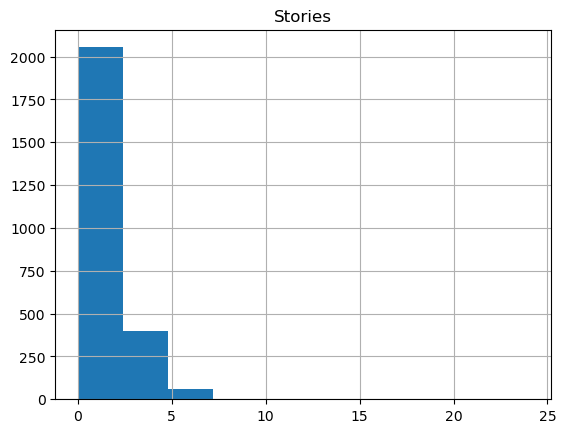

In [35]:
gdf_apts.hist(column='Stories')
plt.show()

Also, let's plot!

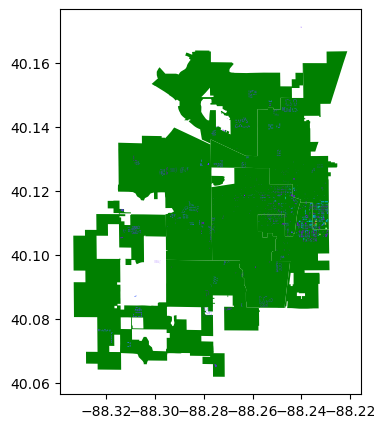

In [36]:
fig, ax = plt.subplots(figsize=(5,5))
gdf_councils.plot(ax=ax, color="green")
gdf_apts.plot(column='Stories', ax=ax, cmap='rainbow')

#ax.set_xlim(-88.35, -88.2)
#ax.set_ylim(40, 40.2)
plt.show()

Zoomed in:

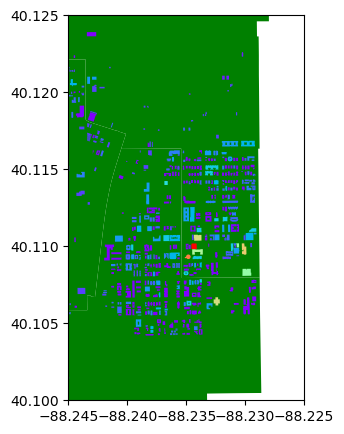

In [37]:
fig, ax = plt.subplots(figsize=(5,5))
gdf_councils.plot(ax=ax, color="green")
gdf_apts.plot(column='Stories', ax=ax, cmap='rainbow')

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

In [38]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None,
       'Fraternity or Sorority', 'Other'], dtype=object)

We have a `None` -- Got to clean again:

In [39]:
#gdf_apts['Building_Type'][gdf_apts['Building_Type'].isnull()] = 'Not specified'
gdf_apts.loc[gdf_apts['Building_Type'].isnull(), 'Building_Type'] = 'Not specified' # pandas friendly

In [40]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Not specified',
       'Fraternity or Sorority', 'Other'], dtype=object)

Let's plot with a legend!  

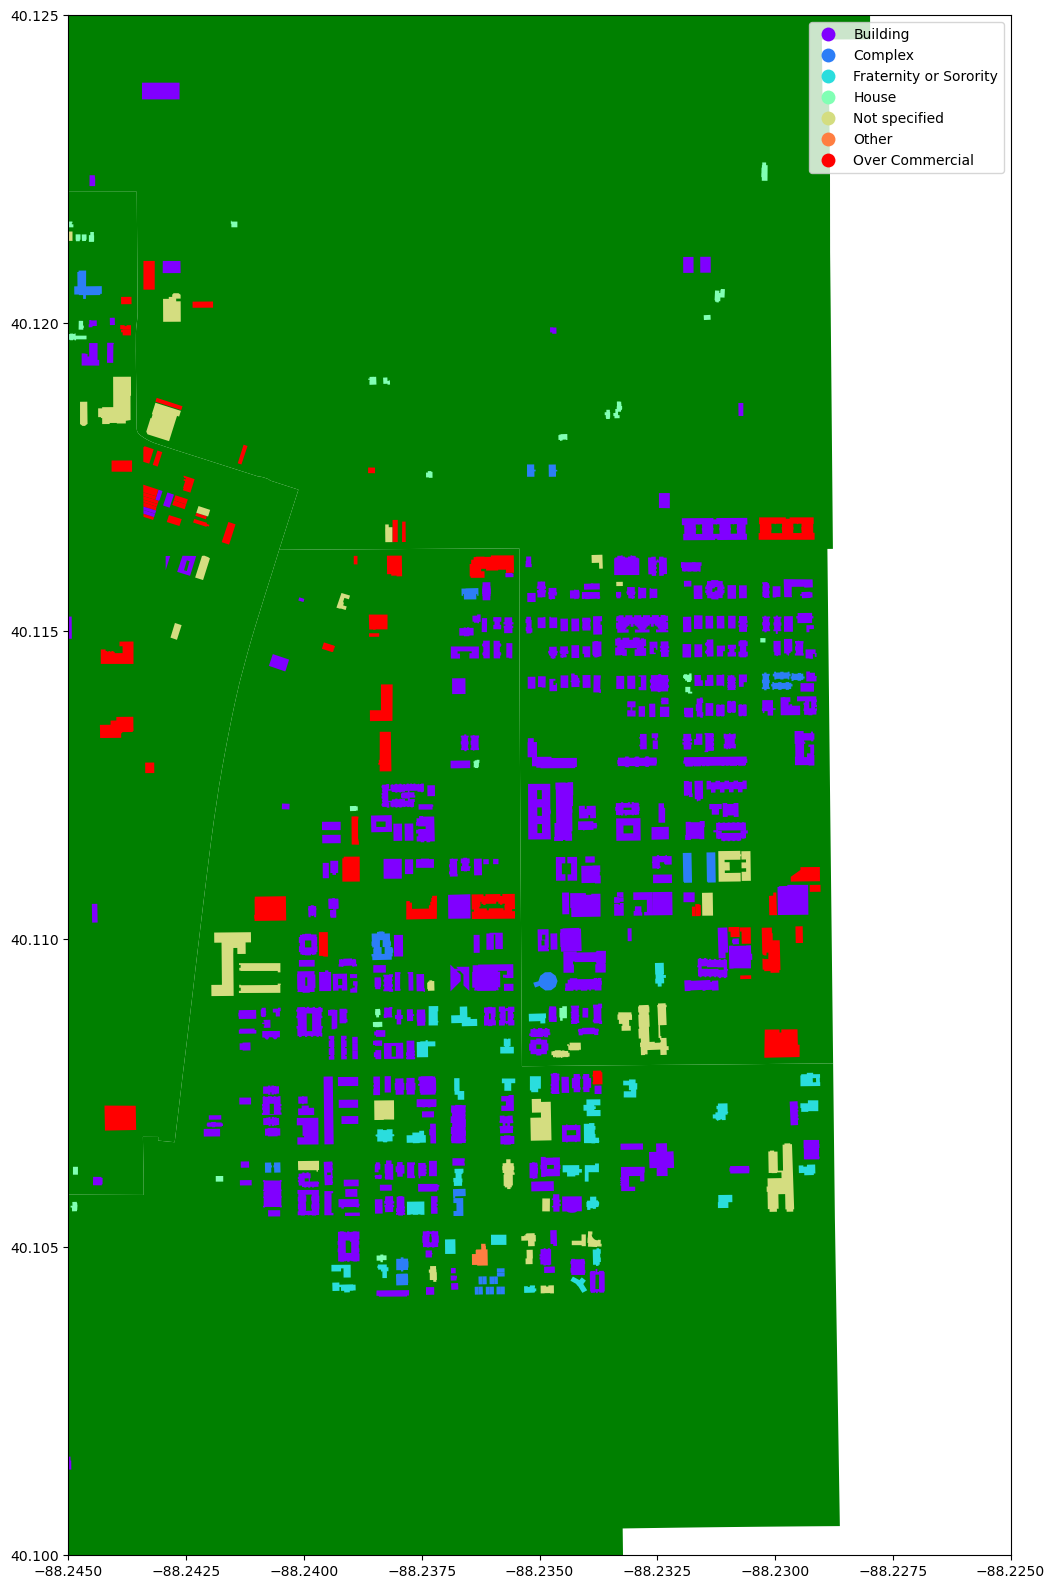

In [42]:
fig, ax = plt.subplots(figsize=(20,20))
gdf_councils.plot(ax=ax, color="green")
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)
plt.show()

### END EXTRA SKIP

### 2.2 Public data with geopandas

Is a bit hard to find, but you can, with a good bit of looking around, find it: https://datagateway.nrcs.usda.gov/

Which can lead you to places like: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html, where you can then navigate to their FTP archive.

Let's grab the state boundaries:

In [43]:
#gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip')
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/STATE/tl_2020_us_state.zip')

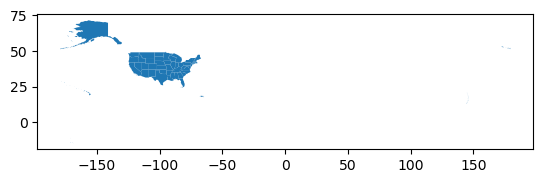

In [44]:
gdf_states.plot()

Let's zoom in to the US and take a look:

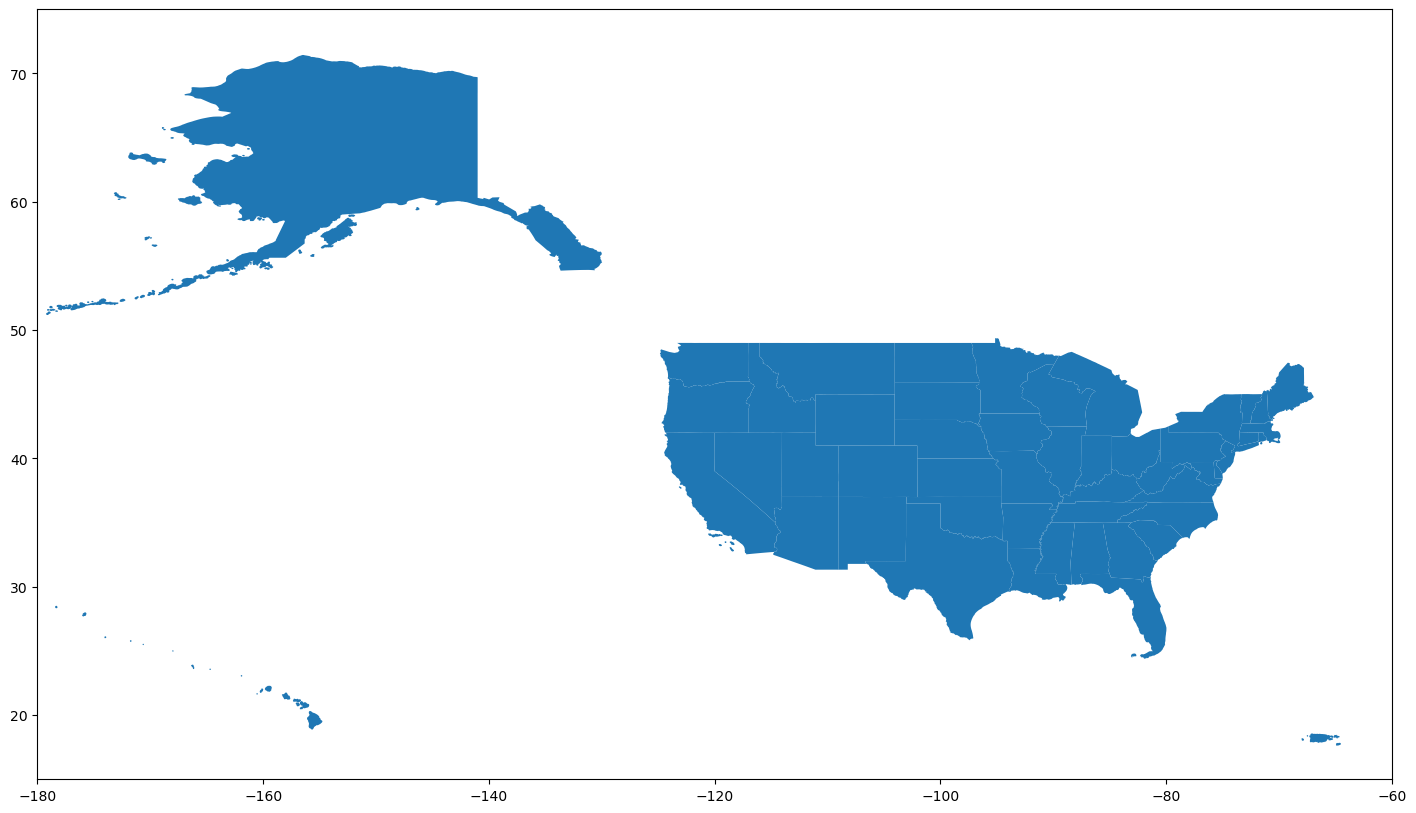

In [45]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_states.plot(ax=ax)

ax.set_xlim(-180,-60)
ax.set_ylim(15, 75)

plt.show()

What other information can we grab?  More digging can lead to:

Which can lead you to: https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2019&layergroup=American+Indian+Area+Geography

You can download the file:

In [46]:
#gdf_na = geopandas.read_file('/Users/jnaiman/Downloads/tl_2020_us_aiannh/tl_2020_us_aiannh.shp')

Or we can ping directly as we did before.

In [47]:
gdf_na = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/AIANNH/tl_2020_us_aiannh.zip')

In [48]:
gdf_na.head()

AIANNHCE  AIANNHNS  GEOID                    NAME  \
0     2320  02419022  2320R                 Mohegan   
1     9100  01930930  9100R  Golden Hill Paugussett   
2     4110  02419484  4110R          Table Mountain   
3     1380  01666180  1380R              Greenville   
4     1110  00806894  1110R                Flathead   

                                     NAMELSAD LSAD CLASSFP COMPTYP AIANNHR  \
0                         Mohegan Reservation   86      D2       R       F   
1  Golden Hill Paugussett (state) Reservation   86      D4       R       S   
2                    Table Mountain Rancheria   85      D8       R       F   
3                        Greenville Rancheria   85      D2       R       F   
4                        Flathead Reservation   86      D2       R       F   

   MTFCC FUNCSTAT       ALAND     AWATER     INTPTLAT      INTPTLON  \
0  G2101        A     2457042        123  +41.4858024  -072.0902766   
1  G2101        A      399343          0  +41.5521875  -072.2680204   
2  G2101        A      371387          0  +36.9850490  -119.6396814   
3  G2101        A      284692          0  +40.1487839  -120.8933989   
4  G2101        A  5013467058  316267874  +47.4967703  -114.2842791   

                                            geometry  
0  MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ...  
1  MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ...  
2  POLYGON ((-119.64082 36.98500, -119.64058 36.9...  
3  POLYGON ((-120.89737 40.15100, -120.89733 40.1...  
4  POLYGON ((-114.85121 47.88721, -114.81989 47.8...

We can see where Native American land's are on the US states map:

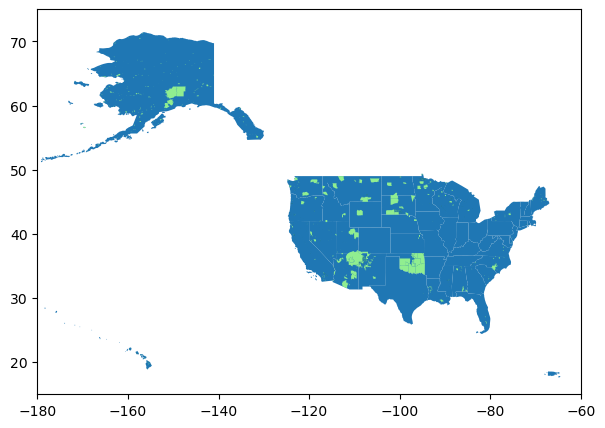

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
gdf_states.plot(ax=ax)
gdf_na.plot(ax=ax, color='lightgreen')
ax.set_xlim(-180,-60)
ax.set_ylim(15, 75)
plt.show()

By type:

In [50]:
gdf_na['NAMELSAD'].unique()

array(['Mohegan Reservation',
       'Golden Hill Paugussett (state) Reservation',
       'Table Mountain Rancheria', 'Greenville Rancheria',
       'Flathead Reservation', 'Bishop Reservation',
       'Fallon Paiute-Shoshone Reservation', 'Walker River Reservation',
       'Los Coyotes Reservation', 'Manzanita Reservation',
       'Mesa Grande Reservation', 'Pala Reservation',
       'Isabella Reservation', 'Mattaponi (state) Reservation',
       'Roaring Creek Rancheria', 'Pueblo of Pojoaque',
       'Rosebud Indian Reservation', 'Woodfords Community',
       'Spokane Reservation', 'Chitimacha Reservation',
       'Coos, Lower Umpqua, and Siuslaw Reservation',
       'Pascua Pueblo Yaqui Reservation', 'Berry Creek Rancheria',
       'Enterprise Rancheria', 'Shakopee Mdewakanton Sioux Community',
       'Santa Rosa Rancheria', "L'Anse Reservation",
       'Paucatuck Eastern Pequot (state) Reservation',
       'Mississippi Choctaw Reservation', 'Duck Valley Reservation',
       'Southe

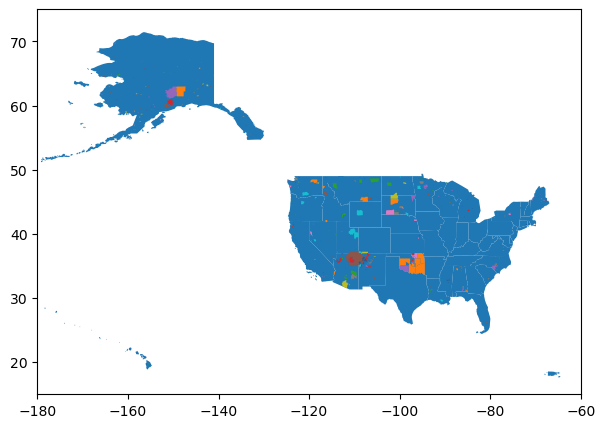

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
gdf_states.plot(ax=ax)
gdf_na.plot(column='NAMELSAD', ax=ax)
ax.set_xlim(-180,-60)
ax.set_ylim(15, 75)
plt.show()

## 3. Geopandas + contextily

Let's go back to our plot of the bouroughs:

In [52]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

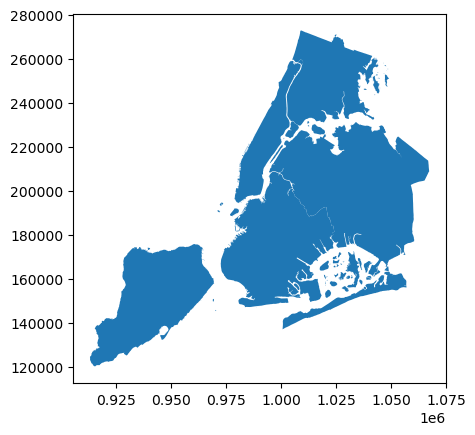

In [53]:
gdf.plot()

Since this is map data, we might expect it to be in lat/long but it is not.  This has to do with the CRS or coordinate-reference-system being used to show this data.  This is sort of like the projection we saw in the lecture.  We can print out what our current CRS is:

In [54]:
gdf.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

So, this might not be super useful right now, but this is just the designation of one sort of coordinate reference system.  We can transform to a lat/long representation with:

In [55]:
gdf = gdf.to_crs(epsg=4326)

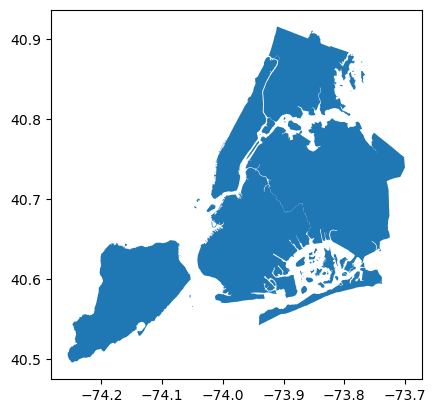

In [56]:
gdf.plot()

Let's put this map into context with a larger map of the area using `contextily` and following the [geopandas docs for adding a basemap](https://geopandas.org/gallery/plotting_basemap_background.html).

First we need to import `contextily` to use it:

In [57]:
import contextily as ctx

The default mapping coordinates for `contextily` are [Web Mercator](https://en.wikipedia.org/wiki/Web_Mercator) so we will need to transform our geometric dataset into the Web Mercator projection:

In [58]:
gdf = gdf.to_crs(epsg=3857)

In [59]:
gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's first plot our NYC data on our own axis:

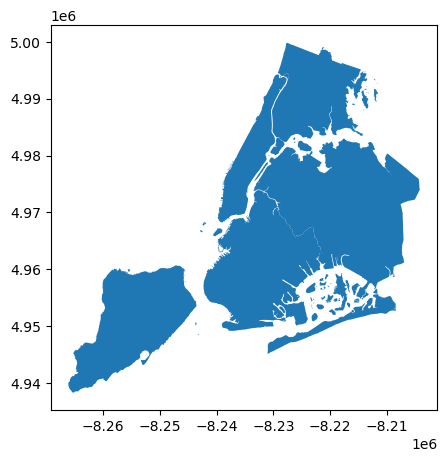

In [60]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf.plot(ax=ax)

plt.show()

So we can see already that the units on the x/y axis are very different!  And even the shapes are a little different than the plots we made above.  Let's re-call this but add a basemap using `contextily`:

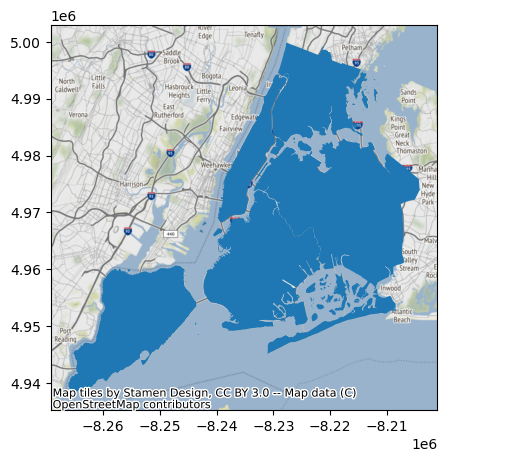

In [61]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
gdf.plot(ax=ax)
ctx.add_basemap(ax=ax)
plt.show()

Hey cool!  We can now see our NYC map on top of a larger map of the NYC area.  Let's make our plot a little see-through so we can see the basemap underneath:

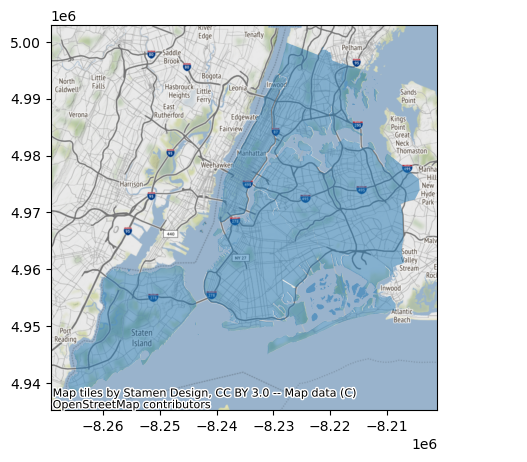

In [62]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
gdf.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax)
plt.show()

Almost there -- let's also add in a black outline for our borows:

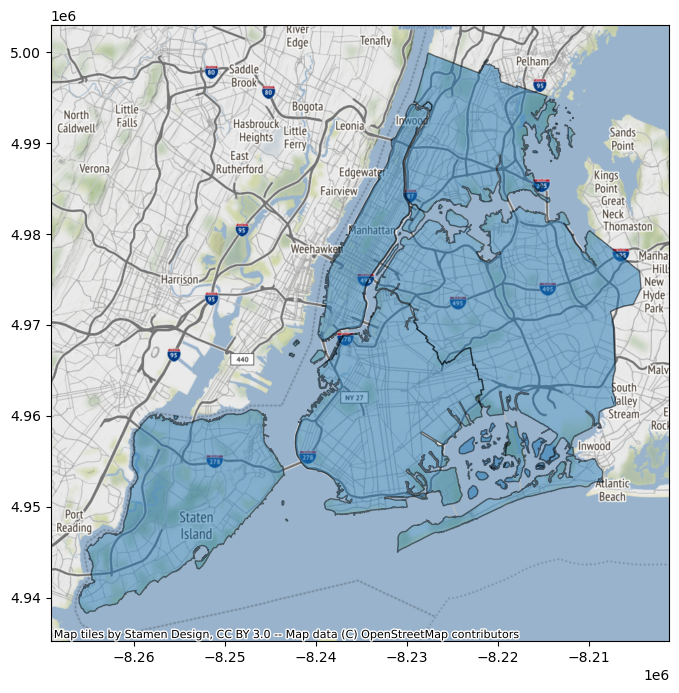

In [63]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

Let's try this with our other `geopandas` layers that we were using before for Champaign:

In [64]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')
# just in case we over-wrote it or something

In [65]:
gdf_councils.head()

OBJECTID_1 District        Council_me   ShapeSTArea  ShapeSTLength  \
0         811        5   Vanna Pianfetti  1.838498e+08  211060.175261   
1         812        3    Daniel Iniguez  2.009197e+08  144362.359386   
2         813        1   Davion Williams  1.078965e+08   83420.727939   
3         814        4  Michael Foellmer  1.049800e+08   77363.320814   
4         815        2       Alicia Beck  5.164512e+07   62243.277115   

                                            geometry  
0  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4  POLYGON ((-88.23537 40.10798, -88.23537 40.107...

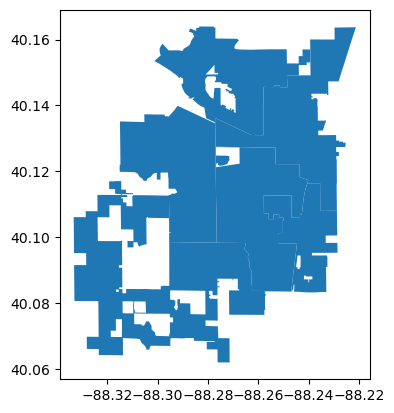

In [66]:
gdf_councils.plot()

First, we transform coordinates into web-mercator:

In [67]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
gdf_councils = gdf_councils.to_crs(epsg=3857)

In [69]:
gdf_councils.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Plot!

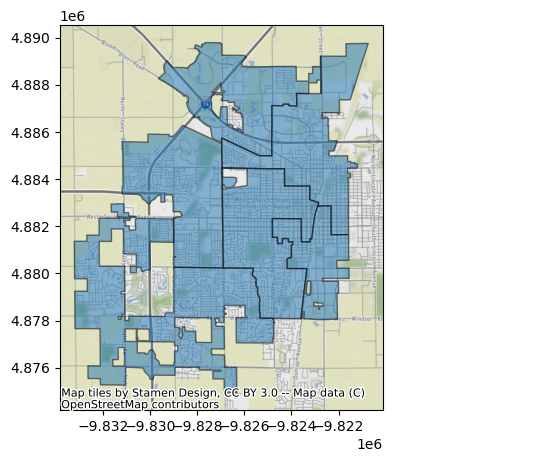

In [70]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')

ctx.add_basemap(ax=ax)

plt.show()

In [71]:
gdf_councils = gdf_councils.to_crs(epsg=4326)

In [72]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

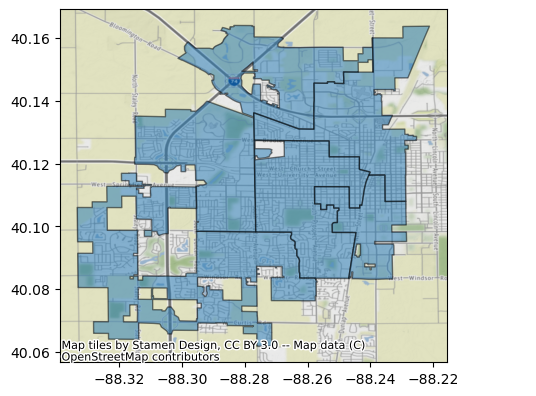

In [73]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')

ctx.add_basemap(ax=ax, crs = gdf_councils.crs)

plt.show()

Neat!  Its sort of hard to see the outlines, so we can also do:

/Users/chenghsuanlin/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


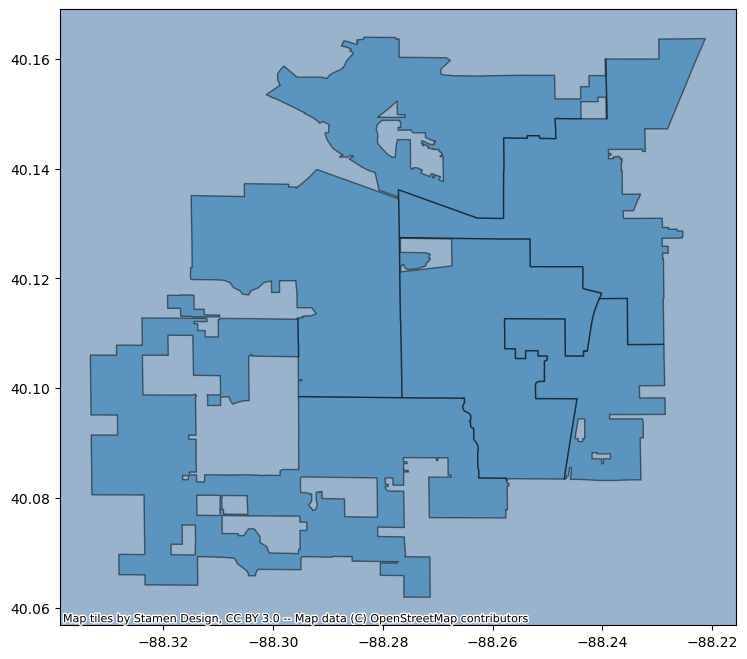

In [74]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

Ok, but its a little confusing with this web-mercator stuff.  We can actually specify the coordinate system of our geopandas dataframe in our call to contextily:

In [75]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')
# re-read

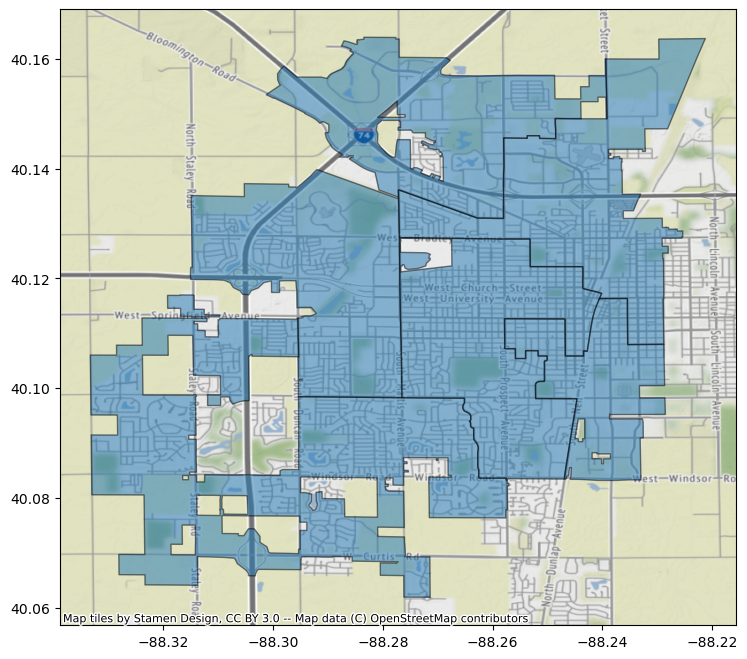

In [76]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)
# here, you might get an error and can try:
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

Let's add on some more layers to this map -- let's grab the apartments dataset from the champaign webpage:

In [77]:
gdf_apts = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

In [78]:
gdf_apts.head()

OBJECTID             Address        Parcel Units Stories  UniqueID  \
0         1  2009 Moreland Blvd  412001126038    36       3       0.0   
1         2  2011 Moreland Blvd  412001126038    36      3        1.0   
2         3  2007 Moreland Blvd  412001126038    24       3       2.0   
3         4  2003 Moreland Blvd  412001126038    36       3       3.0   
4         5  2005 Moreland Blvd  412001126038    24       3       4.0   

        Building_Name                     Complex_Name Case_Number  \
0  2009 Moreland Blvd  University Village at Champaign   AI07-0147   
1  2011 Moreland Blvd  University Village at Champaign   AI07-0147   
2  2007 Moreland Blvd  University Village at Champaign   AI07-0147   
3  2003 Moreland Blvd  University Village at Champaign   AI07-0147   
4  2005 Moreland Blvd  University Village at Champaign   AI07-0147   

  Building_Type  ...                 Last_Date Comments Safety_Comments  \
0       Complex  ... 2007-10-29 05:00:00+00:00                            
1       Complex  ... 2007-10-29 05:00:00+00:00                            
2       Complex  ... 2007-10-29 05:00:00+00:00                            
3       Complex  ... 2007-10-29 05:00:00+00:00                            
4       Complex  ... 2007-10-29 05:00:00+00:00                            

  Fire_Alarms Sprinkler Managing_Company MFRecyclingStatus   ShapeSTArea  \
0         Yes       Yes             None               Yes  19657.996933   
1         Yes       Yes             None               Yes  19735.512411   
2         Yes       Yes             None               Yes  13970.179208   
3         Yes       Yes             None               Yes  19739.423285   
4         Yes       Yes             None               Yes  13065.121447   

   ShapeSTLength                                           geometry  
0     929.167804  POLYGON ((-88.25315 40.14017, -88.25315 40.140...  
1     950.194217  POLYGON ((-88.25260 40.14057, -88.25256 40.140...  
2     678.398035  POLYGON ((-88.25274 40.14045, -88.25274 40.140...  
3     941.358477  POLYGON ((-88.25154 40.13978, -88.25156 40.139...  
4     636.744457  POLYGON ((-88.25351 40.13934, -88.25348 40.139...  

[5 rows x 21 columns]

What kinds of building types do we have?

In [79]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None,
       'Fraternity or Sorority', 'Other'], dtype=object)

Oop, looks like there is a "None" object here.  Let's do a bit of data cleaning by *masking* out these `None` values and setting them to "Not Specified"

In [80]:
gdf_apts.loc[gdf_apts['Building_Type'].isnull(), 'Building_Type'] = 'Not specified'

In [81]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Not specified',
       'Fraternity or Sorority', 'Other'], dtype=object)

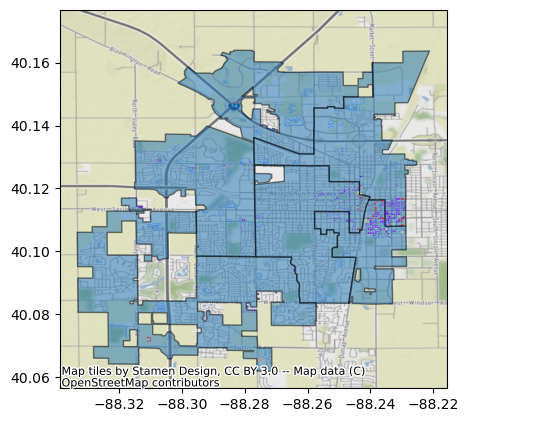

In [82]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

Let's zoom into campus town (where we would all be now!)

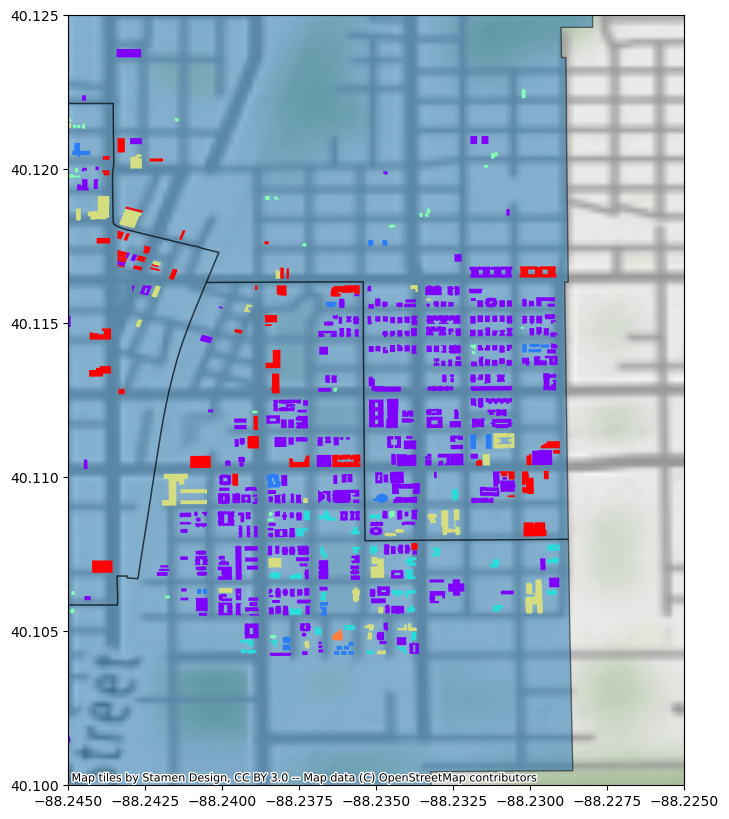

In [83]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

Huh, that's a little fuzzy.  What about if we set our axis zoom region before we ping `contextily` to give us a map?

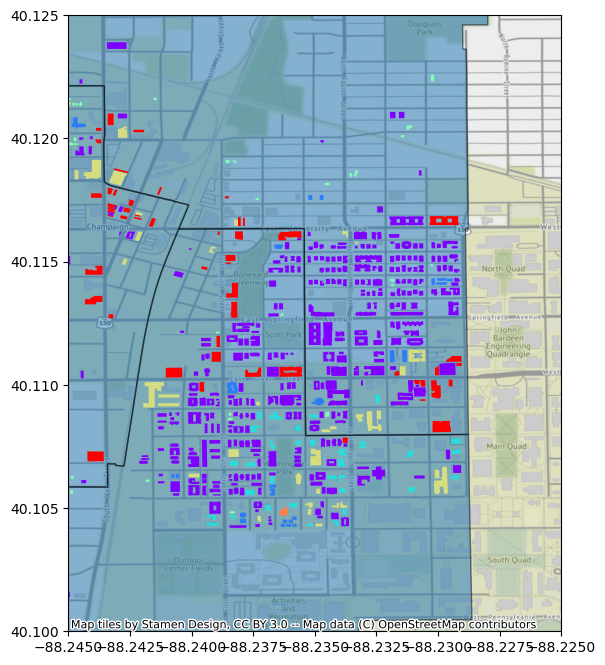

In [94]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow')

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

Lovely! Finally, let's add a legend:

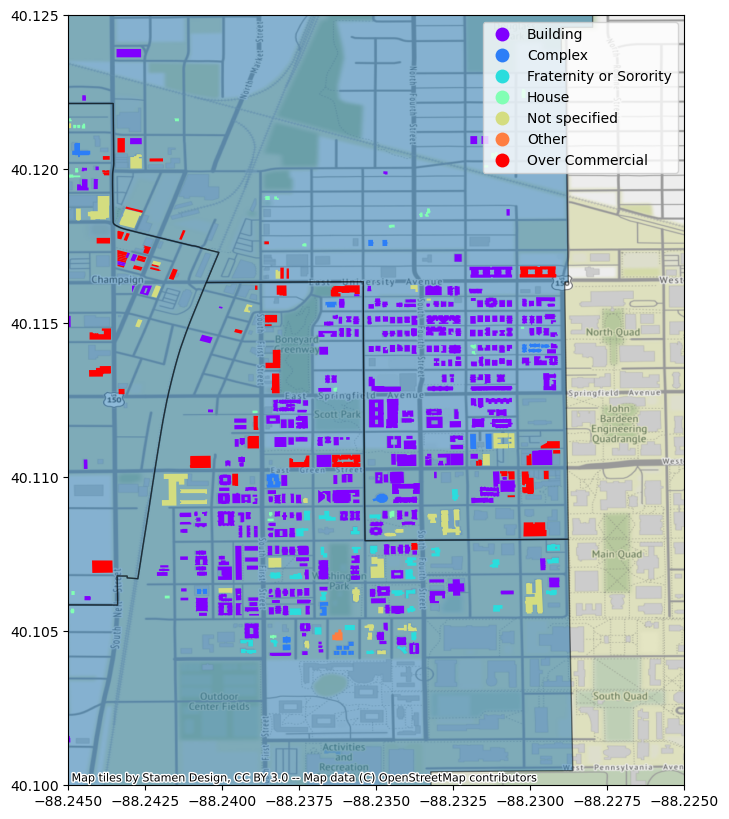

In [85]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

What if I want to only plot one building type?  What about interactively?

## 4. Geopandas + contextily + ipywidgets

In [86]:
import ipywidgets

We'll follow our usual way of using ".interact" to make a "default" kind of widget.

1. We'll start by making our plot with our parameter of choice "hard coded":

In [87]:
# 1. hardcode a plotting option

btype = 'Building'

gdf_apts.loc[gdf_apts['Building_Type']==btype].head() # our subsetted dataframe


OBJECTID            Address                       Parcel Units Stories  \
20        21     410 E Green St  462118129026 & 462118129027    64       5   
21        22     408 E Green St                 462118129017    28       3   
22        23     406 E Green St                 462118129017     9       2   
96        97  1114 Broadmoor Dr                 452023257004     4       1   
97        98  1201 Broadmoor Dr                 452023256021     2       1   

    UniqueID      Building_Name                Complex_Name Case_Number  \
20      20.0     410 E Green St                                    None   
21      21.0     408 E Green St                               AI08-0013   
22      22.0     406 E Green St                               AI08-0013   
96     112.0  1114 Broadmoor Dr                               AI09-0018   
97     113.0  1201 Broadmoor Dr  Broadmoor Drive Apartments        None   

   Building_Type  ...                 Last_Date Comments Safety_Comments  \
20      Building  ...                       NaT     None            None   
21      Building  ... 2008-11-05 06:00:00+00:00                            
22      Building  ... 2008-11-05 06:00:00+00:00                            
96      Building  ... 2010-01-04 06:00:00+00:00                            
97      Building  ...                       NaT     None            None   

   Fire_Alarms Sprinkler Managing_Company MFRecyclingStatus   ShapeSTArea  \
20        None      None             None               Yes  15958.883007   
21        None      None             None               Yes   8914.532782   
22        None      None             None               Yes   2434.252065   
96        None      None             None              None   2008.372170   
97        None      None             None              None   3677.721026   

    ShapeSTLength                                           geometry  
20     507.147218  POLYGON ((-88.23259 40.11039, -88.23218 40.110...  
21     539.800411  POLYGON ((-88.23259 40.11039, -88.23260 40.110...  
22     215.323497  POLYGON ((-88.23284 40.11054, -88.23297 40.110...  
96     187.683177  POLYGON ((-88.26361 40.09367, -88.26373 40.093...  
97     413.708046  POLYGON ((-88.26447 40.09370, -88.26447 40.093...  

[5 rows x 21 columns]

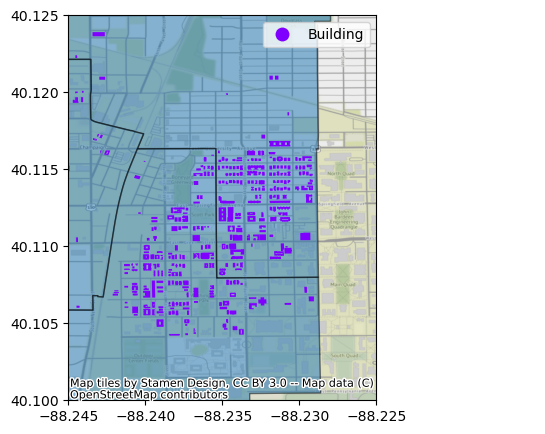

In [93]:
btype = 'Building'

gdf_apts_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype] # our subsetted dataframe


fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apts_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

2. We make this into a function an have our "hard coded" parameter as an input:

In [89]:
#btype = 'Building'

def my_geopandas_plot(btype):
    gdf_apts_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(5,5))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_apts_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

    plt.show()

4. We try out our function a few times:

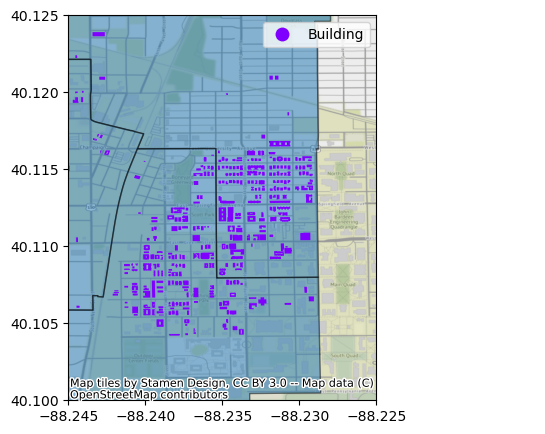

In [90]:
my_geopandas_plot('Building')

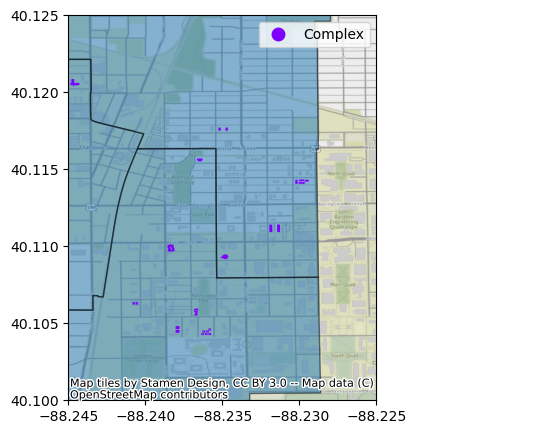

In [91]:
my_geopandas_plot('Complex')

5. Finally, we use `@ipywidgets.interact` to make this interactive:

In [92]:
#3. decorate our (tested) function with an ipywidgets.interact

@ipywidgets.interact(btype=gdf_apts['Building_Type'].unique())
def my_geopandas_plot(btype):
    gdf_apts_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype] # our subsetted dataframe

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_apts_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True) # look what changes

    ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())
    plt.show()

interactive(children=(Dropdown(description='btype', options=('Complex', 'Building', 'House', 'Over Commercial'…

## Extra: Plot waterways

One more!

In [ ]:
gdf_water = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/AREAWATER/tl_2020_01001_areawater.zip')

In [ ]:
gdf_water.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
gdf_water.plot(ax=ax)
plt.show()
# we can see this is showing data for a small subset of the US

Where are these waterways?

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
gdf_states.plot(ax=ax, color='lightgray')
gdf_water.plot(ax=ax, color='magenta')

ax.set_xlim(-87, -86)
ax.set_ylim(32,33)

plt.show()

Let's zoom out a good deal:

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
gdf_states.plot(ax=ax, color='lightgray')
gdf_water.plot(ax=ax, color='magenta')

ax.set_xlim(-88, -80)
ax.set_ylim(26, 34)

plt.show()

## Extra: Using GeoJSON data in bqplot

We can use `requests` to ping websites for GeoJSON files directly.

In [ ]:
import requests

In [ ]:
shape_file_url = 'https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson'
gdata = requests.get(shape_file_url).json()

In [ ]:
gdata

Let's use our champaign county map in bqplot maps.  First, let's zoom into IL:

In [ ]:
sc_geo = bqplot.Mercator(scale_factor = 10000, center=(-88.2434, 40.15)) # long/lat, scale factor is default of 190

state_data = bqplot.topo_load('map_data/USStatesMap.json')

def_tt = bqplot.Tooltip(fields=['id', 'name'])

states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=def_tt)
states_map.interactions = {'click': 'select', 'hover': 'tooltip'}

fig=bqplot.Figure(marks=[states_map], title='US States Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

We can use this scale to plot the Champaign county map:

In [ ]:
sc_geo = bqplot.Mercator(scale_factor = 10000, center=(-88.2434, 40.15)) # long/lat, scale factor is default of 190

mymap = bqplot.Map(map_data=gdata, scales={'projection':sc_geo})

fig=bqplot.Figure(marks=[mymap], title='Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

That's still pretty far out, let's zoom in!

In [ ]:
sc_geo = bqplot.Mercator(scale_factor = 200000, center=(-88.2434, 40.15)) # long/lat, scale factor is default of 190

mymap = bqplot.Map(map_data=gdata, scales={'projection':sc_geo})

fig=bqplot.Figure(marks=[mymap], title='Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

In [ ]:
sc_geo = bqplot.Mercator(scale_factor = 200000, center=(-88.2434, 40.15)) # long/lat, scale factor is default of 190

def_tt = bqplot.Tooltip(fields=['District', 'Council_me'])

mymap = bqplot.Map(map_data=gdata, scales={'projection':sc_geo}, tooltip=def_tt)

mymap.colors = {'default_color':"blue"}

mymap.interactions = {'click': 'select', 'hover': 'tooltip'}

fig=bqplot.Figure(marks=[mymap], title='Map Example',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})
fig

Note: its hard to get two layers on a `bqplot` map however (though this might change in the future).  For multi-layer plots that are interactive, it might be more useful to try a combination of `ipywidgets` and `geopandas`.

### ASIDE

How do I find out what is supported in my tooltip?

In [ ]:
state_data.keys()

In [ ]:
state_data['objects'].keys()

In [ ]:
state_data['objects']['land']

In [ ]:
state_data['objects']['land'].keys()

In [ ]:
state_data['objects']['subunits'].keys()

In [ ]:
len(state_data['objects']['subunits']['geometries'])

In [ ]:
state_data['objects']['subunits']['geometries'][0].keys()

In [ ]:
# the two we are interested in:
print(state_data['objects']['subunits']['geometries'][0]['id'])
print(state_data['objects']['subunits']['geometries'][0]['properties'])

What would be available for my council dataset?

In [ ]:
gdata['features'][0]['properties'] # these are possible keys for our tooltip

### END ASIDE

## Extra: Super quick - ipyleaflet

In [ ]:
#!pip install ipyleaflet
from ipyleaflet import *
# note: you might have to close and reopen you notebook
# to see the map

m = Map(center=(52, 10), zoom=8, basemap=basemaps.Gaode.Satellite)

m

In [ ]:
#!pip install ipyleaflet
from ipyleaflet import *
# note: you might have to close and reopen you notebook
# to see the map

m = Map(center=(52, 10), zoom=8, basemap=basemaps.Gaode.Satellite)

#(2) street maps
strata_all = basemap_to_tiles(basemaps.Strava.All)
m.add_layer(strata_all)
m